In [39]:
%load_ext autoreload
%autoreload 2
import torch
import numpy as np
from sklearn.datasets import load_digits
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as  OA
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Load data set
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)
X_train = torch.as_tensor(X_train, dtype=torch.float64)
y_train = torch.as_tensor(y_train, dtype=torch.long)
X_test = torch.as_tensor(X_test, dtype=torch.float64)
y_test = torch.as_tensor(y_test, dtype=torch.long)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import hdda

In [3]:
model = hdda.HDDA(C=10, th=torch.tensor(0.5), model='M5', dtype=torch.float64)  # we have 10 classes

In [4]:
model.fit(X=X_train,y=y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

0.9666666666666667


In [5]:
qda = QDA(store_covariance=True, reg_param=0.1)
qda.fit(X_train.numpy(), y_train.numpy())
y_pred = qda.predict(X_test.numpy())
print(qda.score(X_test, y_test))

0.9733333333333334


/home/mfauvel/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In order to work, the following code block (line 85) in `base.py` scikit function should be changed to:
`if param1 is not param2: -> if param1 != param2:`
or use a version of scikit lower that 22.

In [62]:
from sklearn.model_selection import GridSearchCV as GCV
param_grid = {
    'model':["M1", "M2", "M3", "M4", "M5", "M6", "M7", "M8"],
    'th' : np.arange(0.01, 0.2, 0.005).tolist()
}
model = hdda.HDDA(C=10, dtype=torch.float64)
grid_CV = GCV(model,
              param_grid=param_grid,
             n_jobs=8)
grid_CV.fit(X_train, y_train)
print(grid_CV.best_params_)

{'model': 'M8', 'th': 0.08999999999999998}


In [53]:
grid_CV.best_estimator_.score(X_test, y_test)

0.9933333333333333

Text(0.5, 1.0, "Best parameters {'model': 'M8', 'th': 0.08999999999999998} \n Train score 0.99 \n Test score: 0.99")

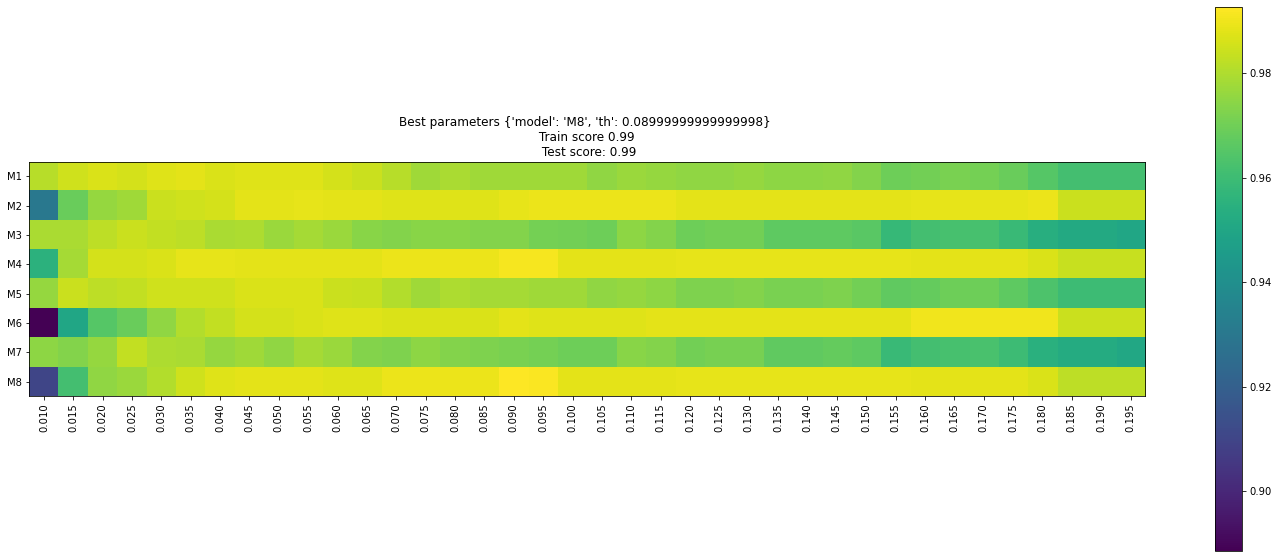

In [63]:
res = [[param["model"], param["th"], err]
       for param, err in zip(grid_CV.cv_results_["params"],
                             grid_CV.cv_results_["mean_test_score"])]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))
im = ax.imshow(
    grid_CV.cv_results_["mean_test_score"].reshape(len(param_grid["model"]), 
                                                   len(param_grid["th"]))
)

ax.set_xticks(range(len(param_grid["th"])))
ax.set_xticklabels([f"{th_:.3f}" for th_ in param_grid["th"]], rotation=90)
#ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_yticks(range(len(param_grid["model"])))
ax.set_yticklabels(param_grid["model"])
cb = fig.colorbar(im, ax=ax)
ax.set_title(f"Best parameters {grid_CV.best_params_} \n Train score {grid_CV.best_score_:.2f} \n Test score: {grid_CV.best_estimator_.score(X_test, y_test):.2f}")

In [60]:
param_grid["th"]

[0.005,
 0.01,
 0.015,
 0.02,
 0.025,
 0.030000000000000002,
 0.034999999999999996,
 0.04,
 0.045,
 0.049999999999999996,
 0.055,
 0.06,
 0.065,
 0.07,
 0.07500000000000001,
 0.08,
 0.085,
 0.09000000000000001,
 0.095,
 0.1,
 0.10500000000000001,
 0.11,
 0.115,
 0.12000000000000001,
 0.125,
 0.13,
 0.135,
 0.14,
 0.14500000000000002,
 0.15,
 0.155,
 0.16,
 0.165,
 0.17,
 0.17500000000000002,
 0.18000000000000002,
 0.185,
 0.19,
 0.195]